In [1]:
using Distributions
using Random
using LinearAlgebra
using PDMats
using ProgressMeter
E = LinearAlgebra.I
eye(n) = Matrix(1.0E,n,n) #identity matrix

#import Fontconfig, Cairo
using Gadfly

In [2]:
using SpecialFunctions

# Numerical Experiment for the gap of free energys between Bayesian NMF and VBNMF

## True, Learner, and Prior

$\mathcal{NM}(M,N,K)$ denotes the set of $M \times N$ non-negative matrices whose elements are in $K \subset [0,\infty)$.
Let $X \in \mathcal{NM}(M,N,\mathbb{N})$, $U \in \mathcal{NM}(M,H,K)$ and $V \in \mathcal{NM}(H,N,K)$. The true or optimal factorization is given by $U_0 \in \mathcal{NM}(M,H_0,K_0)$ and $V_0 \in \mathcal{NM}(H_0,N,K_0)$, where $K_0 \subset (0, \infty)$ and $H_0$ is the non-negative rank.
The $(i,j)$ element of the matrix $W$ is denoted by $W_{ij}$.

The true (data generating) distribution is
$$q(X) = \prod_{i=1}^M \prod_{j=1}^N \mathrm{Poi}(X_{ij} | (U_0V_0)_{ij} ) \propto ((U_0V_0)_{ij})^{X_{ij}} e^{-(U_0V_0)_{ij}}.$$

The learning machine (statistical or likelihood model) is
$$p(X|U,V) = \prod_{i=1}^M \prod_{j=1}^N \mathrm{Poi}(X_{ij} | (UV)_{ij} ) \propto ((UV)_{ij})^{X_{ij}} e^{-(UV)_{ij}}.$$

The prior distribution is a product of gamma distributions like the following;
$$\varphi(U) = \prod_{i=1}^M\prod_{k=1}^H \mathrm{Gam}(U_{ik} |\phi_U, \theta_U) \propto \prod_{i=1}^M\prod_{k=1}^H U_{ik}^{\phi_U -1 } e^{-\theta_U U_{ik}},$$
$$\varphi(V) = \prod_{k=1}^H\prod_{j=1}^N \mathrm{Gam}(V_{kj} |\phi_V, \theta_V) \propto \prod_{k=1}^H\prod_{j=1}^N V_{ik}^{\phi_V -1 } e^{-\theta_V V_{ik}}.$$

### Latent Variable

Let $S$ be an $M \times H \times N$ non-negative tensor whose $(i,k,j)$ element is subject to $\mathrm{Poi}(S[i,k,j]|U_{ik} V_{kj})$.
The learning machine can be understood as the marginalized distribution of
$$p(X|S)p(S|U,V) = \prod_{i=1}^M \prod_{j=1}^N \mathrm{Delta}(X_{ij}|\sum_{k=1}^H S[i,k,j]) \prod_{k=1}^H \mathrm{Poi}(S[i,k,j]|U_{ik} V_{kj}).$$
Indeed, 
$$p(X|U,V) = \sum_S p(X|S) p(S|U,V)$$
holds.

## Gibbs Sampler


### Claim: Gibbs Sampler

Put the dataset $X^n = (X_l)_{l=1}^n$ and the latent variables $S^n = (S_l)_{l=1}^n$.

The posterior given the latent variables is a product of Gamma distributions;
$$\psi_U(U|V,X^n,S^n)=\prod_{k=1}^H \prod_{i=1}^M \mathrm{Gam}(U_{ik}|\hat{\phi}_{U_{ik}},\hat{\theta}_{U_{ik}})
,$$
$$\psi_V(V|U,X^n,S^n)=\prod_{k=1}^H \prod_{j=1}^N \mathrm{Gam}(V_{kj}|\hat{\phi}_{V_{kj}}, \hat{\theta}_{V_{kj}}),$$
where
$$\hat{\phi}_{U_{ik}} = \sum_{l=1}^n \sum_{j=1}^N S_l[i,k,j] + \phi_U,$$
$$\hat{\theta}_{U_{ik}} =n \sum_{j=1}^N V_{kj} + \theta_U,$$
$$\hat{\phi}_{V_{kj}} = \sum_{l=1}^n \sum_{i=1}^M S_l[i,k,j] + \phi_V, $$
$$\hat{\theta}_{V_{kj}} =n \sum_{i=1}^M U_{ik} + \theta_V.$$

The latent variable distribution is a product of multinomial distributions;
$$Pdf(S^n|X^n,U,V) = \prod_{l=1}^n\prod_{i=1}^M\prod_{j=1}^N \mathrm{Multi}(S_l[i,:,j] \mid \pi[i,:,j]),$$
where
$$\pi[i,k,j] = \frac{U_{ik}V_{kj}}{\sum_{k=1}^H U_{ik}V_{kj}},$$
$$\sum_{k=1}^H \pi[i,k,j]=1.$$ 

## Theoretical Result

Let $G_n$ be the Bayesian generalization error in NMF. The following asymptotic inequaliy holds:
$$\mathbb{E}[G_n] = \frac{\lambda}{n} + o\left( \frac{1}{n} \right) \leqq \frac{\overline{\lambda}}{n} + o\left( \frac{1}{n} \right),$$
where
$$\overline{\lambda} = \frac{1}{2}[H_0(M+N-1) + (H-H_0)\min\{M\phi_U, N\phi_V\}].$$
Especially, if $H=H_0=1$ or $H_0=0$, then the equality holds.

The above $\lambda$ is called the *real log canonical threshold* or *learning coefficient*.
The Bayesian free energy in NMF $F_n$ has also asymptotic expansion whose leading term is $\lambda \log n$:
$$F_n = nS_n + \lambda \log n + o_p(\log n),$$
where $S_n$ is the emperical entropy which depends only the true distribution:
$$S_n = -\frac{1}{n} \sum_{i=1}^n \log q(X_i).$$

On the other hand, the variational free energy in NMF $F^{vb}_n$ satisfies the following asymptotic equality:
$$F^{vb}_n = nS_n + \lambda_{vb} \log n + o_p(\log n)$$
and the variational learning coefficient $\lambda_{vb}$ is exactly calculated in \[Kohjima+ 2017\]. Kohjima has also numerically verified his theoretical result. Thus, we do not need to run VBNMF experiment. 

Our main result is deriving (1) the upper bound of $G_n$ and (2) the lower bound of $F^{vb}_n - F_n$.
The leading terms of both $G_n$ and $F^{vb}_n - F_n$ depend $\lambda$. If $\lambda$ is numerically calculated, then we can emperically verify the our theoretical result (1) and (2). Therefore, we only have to run Bayesian NMF experiment for numerically calculating $\lambda$.

## Experiment

We numerically calculate $\lambda$ using Gibbs sampler.
Let $S_n$ be the empirical entropy, $G_n$ be the Bayesian generalization error, and $W_n$ be the widely applicable information criterion (WAIC).
The following equality holds:
$$G_n + W_n - S_n = 2\lambda/n + o_p(1/n).$$
We call $W_n - S_n$ the normalized WAIC. Note that $S_n$, $G_n$, and $W_n$ are random variables but the leading term $2\lambda/n$ is deterministic. To decrease the probabilistic effect of the minor term $o_p(1/n)$, we calculate $n(G_n + W_n -S_n)/2$ several times and average it overall the independent datasets.

The belief procedure of our experiment is the following. 
1. Allocate an array $\Lambda$::Array{Float64,1} whose length is $SIMITETRS$.
2. For $iter=1:SIMITERS$
    1. Generate artificial dataset independentally.
    2. Run Gibbs sampler of NMF and get samples subject to the posterior.
    3. Calculate $G_n$ and $W_n -S_n$. 
    4. Save the value $\Lambda[iter] \leftarrow n(G_n + W_n -S_n)/2$. 
3. End For.
4. Calculate the mean of $\Lambda$: $\hat{\lambda} = (1/SIMITERS)(\Lambda[1] + \ldots + \Lambda[SIMITERS])$. $\hat{\lambda}$ is the numerically computed value of $\lambda$.

In [3]:
# fundamaental setting
## calc. RLCT
SIM_ITERS = 20
LOG_FILE_PATH = joinpath("log","result.csv")
## MCMC
MCMC_K = 1000
BURNIN = 20000
THIN = 20
MCMC_ITER = BURNIN + THIN*MCMC_K
## true and model
#Random.seed!(1959)
eps = 1e-5
U_0 = [1; 2; 3; 1-eps]
V_0 = [1 9 9 1+eps]
#const A_0 = ones(10,1).*[0.1; 0.05; 0.02; 0.03; 0.15; 0.25; 0.1; 0.1; 0.15; 0.05] #[0.4 0.3; 0.1 0.3; 0.4 0.2; 0.1 0.2;]#np.array([[0.5,0.3],[0.1,0.3],[0.4,0.4]])
#const B_0 = ones(Float64,1,9) #[0.1 0.1 0.4; 0.9 0.9 0.6;] #np.array([[0.1,0.1,0.4],[0.9,0.9,0.6]])
M = 4 #size(A_0)[1] #vocab. size
N = 4 #size(B_0)[2] #num of docs
H = 2 #num of topics in learner
H_0 = 1 #size(A_0)[2] #true num of topics
## hyper parameter
PHI_U = 0.25
THETA_U = 1.0
PHI_V = 0.75
THETA_V = 1.0
## data
SEED = 1994
#Random.seed!(SEED);
L = 500
SAMPLESIZE = L
TESTSIZE = 100*SAMPLESIZE #15000 #100*SAMPLESIZE

println(U_0)
println(V_0)
println(U_0 * V_0)

[1.0, 2.0, 3.0, 0.99999]
[1.0 9.0 9.0 1.00001]
[1.0 9.0 9.0 1.00001; 2.0 18.0 18.0 2.00002; 3.0 27.0 27.0 3.00003; 0.99999 8.99991 8.99991 0.9999999999000001]


In [4]:
function generate_matrix_from_prior(nR, nC; phi=PHI_V, theta=THETA_V, seed=10000)
    W = zeros(Float64, nR, nC);
    for i in 1:nR
        for j in 1:nC
            W[i,j] = rand(Gamma(phi, 1/theta))
        end
    end
    return W
end

generate_matrix_from_prior (generic function with 1 method)

In [5]:
function generate_data(U, V; n::Int=SAMPLESIZE, seed=1)
    #===
    for l=1:n
        generate words from Cat(x|AB[:,j]) for j=1,...,N
        as two format: docs array (N, n//N, M) and words array (n, M)
    end

    :param U: stochastic matrix A= (the probability that the word is i when the topic is k)
    :type U: shape is (M,H)
    :param V: stochastic matrix B= (the probability that the topic is k when the doc is j)
    :type V: shape is (H,N)
    :param n: the number of all words in all document. sample size
    :type n: Int
    :return: generated data matrices whose [i,j,l] entry is the (i,j)-element in the l-th matrix.
    :rtype: Array{Int,3}
    ===#
    Random.seed!(seed);
    C = U*V
    #M = size(C)[1]
    #N = size(C)[2]
    Xs_arr = zeros(Int,M,N,n)
    for i in 1:M
        for j in 1:N
            X_ij = rand(Poisson(C[i,j]), n)
            Xs_arr[i,j,:] = X_ij;
        end
    end
    return Xs_arr    
end

generate_data (generic function with 1 method)

In [6]:
# each sampling step for Gibbs sampler
function latent_step(Xs_arr::Array{Int64,3}, U, V; n=SAMPLESIZE)
    #===
    latent variable sampling step.
    
    :param Xs_arr: data
    :param U: param matrix
    :param V: param matrix
    :return: a latent variable s whose shape is (M,H,N,n)
    ===#
    #H = size(A)[2]
    #N = size(B)[2]
    #L = div(n, N)
    W = U*V #W_ij = sum_k U_ik V_kj
    π = zeros(Float64, M, H, N)
    s = zeros(Float64, M, H, N, n)
    for i in 1:M
        U_i = H>1 ? U[i,:] : U
        for j in 1:N
            V_j = H>1 ? V[:,j] : V
            π[i,:,j] = U_i.*V_j ./ W[i,j]
            for l in 1:n
                s[i,:,j,l] = rand(Multinomial(Xs_arr[i,j,l], π[i,:,j]))
            end
        end
    end
    return s
end
    
function U_step(s, V, phi_U, theta_U; n=SAMPLESIZE)
    #===
    matrix U sampling step.
    
    :param s: latent variable tensor; shape is (M, H, N, n)
    :param phi_U: hyperparameter of Gamma prior for U (RLCT depends on it)
    :param theta_U: hyperparameter of Gamma prior for U (RLCT does not depend on it)
    :return: param matrix U
    ===#
    hat_phi_U = sum(s, dims=(3,4)) .+ phi_U
    hat_theta_U = n .* sum(V, dims=2) .+ theta_U
    ## Note: Gamma dist in Julia is x^{phi-1} e^{-x/theta_julia}.
    ## Thus: our theta must be inversed for plugin: Gamma(phi, theta_julia = 1/theta ).
    U = zeros(Float64, M, H)
    for i in 1:M
        for k in 1:H
            U[i,k] = rand(Gamma(hat_phi_U[i,k,1,1], 1 ./ hat_theta_U[k,1]))
        end
    end
    return U
end

function V_step(s, U, phi_V, theta_V; n=SAMPLESIZE)
    #===
    matrix V sampling step.
    
    :param s: latent variable tensor; shape is (M, H, N, n)
    :param phi_V: hyperparameter of Gamma prior for V (RLCT depends on it)
    :param theta_V: hyperparameter of Gamma prior for V (RLCT does not depend on it)
    :return: param matrix U
    ===#
    hat_phi_V = sum(s, dims=(1,4)) .+ phi_V
    hat_theta_V = n .* sum(U, dims=1) .+ theta_V
    ## Note: Gamma dist in Julia is x^{phi-1} e^{-x/theta_julia}.
    ## Thus: our theta must be inversed for plugin: Gamma(phi, theta_julia = 1/theta ).
    V = zeros(Float64, H, N)
    for k in 1:H
        for j in 1:N
            V[k,j] = rand(Gamma(hat_phi_V[1,k,j,1], 1 ./ hat_theta_V[1,k]))
        end
    end
    return V
end

V_step (generic function with 1 method)

The pmf of the learning machine (statistical or likelihood model) is
$$p(X|U,V) = \prod_{i=1}^M \prod_{j=1}^N \mathrm{Poi}(X_{ij} | (UV)_{ij} ) ,$$
$$\mathrm{Poi}(X_{ij} | (UV)_{ij} ) = ((UV)_{ij})^{X_{ij}} e^{-(UV)_{ij}}/X_{ij}!$$

In [10]:
function model_pmf(X::Array{Int64,2}, U, V)
    #===
    probability mass function of model p(X | A,B).
    See also the above markdown cell.
    
    :param X: an (M,N) non-negative integer matrix which means a data.
    :param U: an (M,H) non-negative matrix.
    :param V: an (H,N) non-negative matrix.
    ===#
    #mass = 1.0
    W = U*V
    #Brute Forse
    #===for i in 1:M
        for j in 1:N
            mass *= pdf(Poisson(W[i,j]), X[i,j])
        end
    end===#
    log_mass = sum(X.*log.(W) - W - loggamma.(X.+1))
    mass = exp(log_mass)
    return mass
end

model_pmf (generic function with 1 method)

In [16]:
# Gibbs sampler
function run_all_sampling!(
        Xs_arr::Array{Int64,3}, init_S,
        #allSs::Array{Int64,5},
        allUs::Array{Float64,3}, allVs::Array{Float64,3})
    #===
    run Gibbs sampling before doing burn-in and thining.
    
    :param Xs_arr: dataset; shape is (M, N, n)
    :param init_S: initial value of the latent variable; shape is (M, H, N, n)
    :param allSs: (to be mutated!) all sample of latent variables; shape is (M, H, N, n, sampling_iters)
    :param allUs: (to be mutated!) all samle of parameter U; shape is (M, H, sampling_iters)
    :param allVs: (to be mutated!) all samle of parameter V; shape is (H, N, sampling_iters)
    :return: void (this function is mutator of allSs, allUs, and allVs.)
    ===#
    ## get the number of iterations and check array size
    iters = size(allUs)[3];
    @assert size(allVs)[3]==iters
    ## get hyperparameter
    ϕ_U = PHI_U;
    θ_U = THETA_U;
    ϕ_V = PHI_V;
    θ_V = THETA_V;
    ## define Progress object for checking iteration progress
    sampling_progress = Progress(iters);
    ## set S to the initial value
    S = init_S;
    ## set V to the initial value from the prior
    V = generate_matrix_from_prior(H, N)
    ## start all sampling
    @time for k in 1:iters
        ## parameter matrix sampling and saving
        U = U_step(S, V, ϕ_U, θ_U);
        V = V_step(S, U, ϕ_V, θ_V);
        allUs[:,:,k] = U;
        allVs[:,:,k] = V;
        ## latent variable sampling and saving
        S = latent_step(Xs_arr, U, V);
        #allSs[:,:,:,:,k] = S;
        ## Progress update
        next!(sampling_progress);
    end
    #return (allYs, allAs, allBs)
end

function run_process_posterior!(
        Xs_arr::Array{Int64,3}, 
        #allSs::Array{Int64,5},
        allUs::Array{Float64,3}, allVs::Array{Float64,3},
        #gsSs::Array{Int64,5},
        gsUs::Array{Float64,3}, gsVs::Array{Float64,3}, likelihoodMat::Array{Float64,2};
        K::Int=MCMC_K, burn::Int=BURNIN, th::Int=THIN, n::Int=SAMPLESIZE)
    #===
    For sampling result, this function do burn-in, thining, and calculating the likelihood matrix (for WAIC).
    ===#
    # burnin and thining
    ## check MCMC samplesize
    #@assert size(gsUs)[3]==size(gsSs)[5]
    @assert size(gsUs)[3]==size(gsVs)[3]
    @assert size(gsUs)[3]==K
    ## define Progress object.
    thining_progress = Progress(K);
    ## run thining and burn-in
    @time for k in 1:K
        U = allUs[:,:,burn+k*th];
        gsUs[:,:,k] = U;
        V = allVs[:,:,burn+k*th];
        gsVs[:,:,k] = V;
        #gsSs[:,:,:,:,k] = allSs[:,:,:,:,burn+k*th];
        ## generated quantity: likelihood matrix
        #likelihoodMat = calc_likelihoodMat!(k, words_arr, doc_onehot, A, B, likelihoodMat)
        for l in 1:n
            X = Xs_arr[:,:,l];
            likelihoodMat[l,k] = model_pmf(X,U,V);
        end
        next!(thining_progress);
    end
    #return (gsYs, gsAs, gsBs, likelihoodMat)
end

function run_Gibbs_sampler_cored(
    Xs_arr::Array{Int64,3}; K::Int=MCMC_K, burn::Int=BURNIN, th::Int=THIN, n::Int=SAMPLESIZE, seed_MCMC=2)
    #===
    Version: separating core functions
    ===#
    Random.seed!(seed_MCMC);
    ## initial value of A and B is sampled from the prior distributuion
    #### Assume that prior is SYMMETRIC Gamma distribution. Hyparam is scalar.
    init_U = generate_matrix_from_prior(M, H; phi=PHI_U, theta=THETA_U);
    init_V = generate_matrix_from_prior(H, N; phi=PHI_V, theta=THETA_V);
    init_S = latent_step(Xs_arr, init_U, init_V);
    ## sampling iteration
    #### allocate tensors for MCMC sample
    iters = burn + K*th;
    allUs = zeros(Float64, M, H, iters);
    gsUs = zeros(Float64, M, H, K);
    allVs = zeros(Float64, H, N, iters);
    gsVs = zeros(Float64, H, N, K);
    #allSs = zeros(Int64, M, H, N, n, iters);
    #gsSs = zeros(Int64, M, H, N, n, K);
    #### all sampling
    println("Start $iters iteration for GS")
    run_all_sampling!(Xs_arr, init_S, allUs, allVs)
    ## burnin and thining
    likelihoodMat = zeros(Float64, n, K)
    println("Start burn-in and thining from $iters to $K")
    run_process_posterior!(Xs_arr, allUs, allVs, gsUs, gsVs, likelihoodMat)
    return (gsUs, gsVs, likelihoodMat)
end



run_Gibbs_sampler_cored (generic function with 1 method)

In [17]:
function run_prior_sampling(Xs_arr; K=MCMC_K, burn=BURNIN, th=THIN, n=SAMPLESIZE, seed_MCMC=2)
    #===
    Run prior sampling K times.
    
    :return: sample of Y(topic indicator variable),A and B from GS and likelihood matrix
    :rtype: tuple(Array{Bool,3};shape(H,n,K), Array{Float64,3};shape(M,H,K), Array{Float64,3};shape(H,N,K), Array{Float64,2};shape(n,K))
    ===#
    Random.seed!(seed_MCMC);
    ## sampling iteration
    #### allocate tensors for MCMC sample
    gsUs = zeros(Float64, M, H, K);
    gsVs = zeros(Float64, H, N, K);
    #gsSs = zeros(Int64, M, H, N, n, K);
    #### all sampling and calc. likelihood Mat
    println("Start $K iteration for prior sampling (no thining)")
    sampling_progress = Progress(K);
    likelihoodMat = zeros(Float64, n, K)
    @time for k in 1:K
        ## sampling and saving
        U = generate_matrix_from_prior(M, H; phi=PHI_U, theta=THETA_U);
        V = generate_matrix_from_prior(H, N; phi=PHI_V, theta=THETA_V);
        S = latent_step(Xs_arr, U, V);
        gsUs[:,:,k] = U;
        gsVs[:,:,k] = V;
        #gsSs[:,:,:,:,k] = S;
        ## calc likelihood matrix
        for l in 1:n
            X = Xs_arr[:,:,l];
            likelihoodMat[l,k] = model_pmf(X,U,V);
        end
        ## Progress update
        next!(sampling_progress);
    end
    return (gsUs, gsVs, likelihoodMat)
end

run_prior_sampling (generic function with 1 method)

### Theoretical Property of Generalization Error and WAIC

The numerical WAIC is defined by
$$W_n = T_n + V_n / n,$$
where
$$T_n = -\frac{1}{n}\sum_{l=1}^n \log p^*(x_l),$$
$$p^*(x_l | z_l) = \frac{1}{K}\sum_{k=1}^K p(x_l|w_k),$$
and
$$V_n = \sum_{l=1}^n \left[ \frac{1}{K}\sum_{k=1}^K(\log p(x_l|w_k))^2 - \left\{ \frac{1}{K}\sum_{k=1}^K \log p(x_l|w_k) \right\}^2 \right].$$
The normalized WAIC is defined by
$$W_n - S_n = T_n - S_n + \frac{V_n}{n} = \frac{1}{n}\sum_{l=1}^n \log \frac{q(x_l)}{p^*(x_l)} + \frac{V_n}{n}.$$

On the other hand, the numerical generalization error is defined by
$$G_n = \frac{1}{T}\sum_{t=1}^T \log \frac{q(x_t)}{p^*(x_t)}.$$

In the singular learning theory ($K \rightarrow \infty$, i.e. theoretical posterior mean is considered),
the following property is known and useful for calculating the RLCT $\lambda$:
$$G_n + W_n - S_n = \frac{2\lambda}{n} + o_p\left( \frac{1}{n} \right).$$
This equation means that $G_n$ and $W_n - S_n$ asymptotically has same variance.

In [18]:
# define functions for calculating RLCT
function calc_functional_var(loglikeMat::Array{Float64,2})
    #===
    Calculate functional variance from loglike matrix.
    
    :param loglikeMat: a matrix whose (l,k) element is log p(x_l|z_l,A_k,B_k)
    ===#
    n = size(loglikeMat)[1];
    K = size(loglikeMat)[2];
    first_term = reshape(mean(loglikeMat.^2, dims=2),n);
    second_term = reshape(mean(loglikeMat, dims=2).^2, n);
    func_var = sum(first_term - second_term);
    return func_var
end

function calc_predict_dist(X, Us, Vs)
    #===
    Calculate pmf of predictive distribution.
    
    :param X: an (M,N) matrix which means a new data.
    :param Us: an Array whose [:,:,k] element means an MCMC sample of U.
    :param Vs: an Array whose [:,:,k] element means an MCMC sample of V.
    ===#
    @assert size(Us)[3]==size(Vs)[3];
    K = size(Vs)[3];
    mass = 0.0;
    for k in 1:K
        mass += model_pmf(X, Us[:,:,k], Vs[:,:,k]);
    end
    return mass/K
end

function calc_normalized_WAIC(Xs_arr, true_U, true_V, likelihoodMat)
    #===
    Calculating normalized WAIC.
    ===#
    n = SAMPLESIZE;
    emp_loss = -mean(log.(mean(likelihoodMat, dims=2)));
    emp_entropy = -mean([log(model_pmf(Xs_arr[:,:,l], true_U, true_V)) for l in 1:n])
    func_var = calc_functional_var(log.(likelihoodMat))
    #println(typeof(emp_entropy))
    normalized_WAIC = emp_loss + func_var/n - emp_entropy
    return normalized_WAIC
end

function calc_generalization_error(true_U, true_V, Us, Vs; nT=TESTSIZE, seed_T=3)
    #===
    Calculating generalization error using test data generated by true distribution.
    ===#
    test_Xs_arr = generate_data(true_U, true_V, n=nT, seed=seed_T)
    ge = 0.0
    calc_gerr_progress = Progress(nT)
    println("Test sample size nT = $nT")
    @time for t in 1:nT
        q = model_pmf(test_Xs_arr[:,:,t], true_U, true_V)
        pred = calc_predict_dist(test_Xs_arr[:,:,t], Us, Vs)
        ge += log(q) - log(pred) #log(q/pred), but q and pred is small number.
        next!(calc_gerr_progress)
    end
    ge /= nT
    return ge
end


calc_generalization_error (generic function with 1 method)

In [19]:
function calc_hamiltonian_unif(likelihoodMat)
    #===
    Calculate hamiltonian if the prior is uniform.
    I.e. this function calclutates negative logarithm likelihood at each MCMC sample.
    ===#
    K = size(likelihoodMat)[2]
    #@assert K==size(As)[3]
    #@assert K==size(Bs)[3]
    loglikeMat = log.(likelihoodMat)
    loglike = sum(loglikeMat, dims=1)[1,:]
    @assert length(loglike) == K
    return -loglike
end

calc_hamiltonian_unif (generic function with 1 method)

In [20]:
function run_single_inference(true_U, true_V, seed)
    #===
    Run single inference for debug mode.
    ===#
    Random.seed!(seed);
    train_X = generate_data(true_U, true_V, n=SAMPLESIZE, seed=seed+1);
    println("Gibbs Sampling")
    param_Us, param_Vs, likelihoodMat = run_Gibbs_sampler_cored(train_X, seed_MCMC=seed+2);
    println("Calculation Hamiltonian trace")
    hamils = calc_hamiltonian_unif(likelihoodMat)
    println("Calculation Normalized WAIC")
    normalized_WAIC = calc_normalized_WAIC(train_X, true_U, true_V, likelihoodMat);
    println("Calculaton Generalization Error")
    ge = calc_generalization_error(true_U, true_V, param_Us, param_Vs, seed_T=seed+3);
    return (hamils, ge, normalized_WAIC)
end

run_single_inference (generic function with 1 method)

In [21]:
function run_single_inference_debug(true_U, true_V, seed)
    #===
    Run single inference for debug mode.
    ===#
    Random.seed!(seed);
    train_X = generate_data(true_U, true_V, n=SAMPLESIZE, seed=seed+1);
    println("Gibbs Sampling")
    param_Us, param_Vs, likelihoodMat = run_Gibbs_sampler_cored(train_X, seed_MCMC=seed+2);
    println("Calculation Normalized WAIC")
    normalized_WAIC = calc_normalized_WAIC(train_X, true_U, true_V, likelihoodMat);
    println("Calculaton Generalization Error")
    ge = calc_generalization_error(true_U, true_V, param_Us, param_Vs, seed_T=seed+3);
    return (param_Us, param_Vs, likelihoodMat, ge, normalized_WAIC)
end

run_single_inference_debug (generic function with 1 method)

In [35]:
function run_single_inference_PS(true_U, true_V, seed)
    #===
    Run single inference using prior sampling (worst benchmark).
    ===#
    Random.seed!(seed);
    train_X = generate_data(true_U, true_V, n=SAMPLESIZE, seed=seed+1);
    println("Prior Sampling")
    latent_Ss, param_Us, param_Vs, likelihoodMat = run_prior_sampling(train_X, seed_MCMC=seed+2)
    println("Calculation Normalized WAIC")
    normalized_WAIC = calc_normalized_WAIC(train_X, true_U, true_V, likelihoodMat);
    if normalized_WAIC>1e10
        normalized_WAIC = 1e10
    elseif isnan(normalized_WAIC)
        normalized_WAIC = 1e12 + 2e11
    elseif normalized_WAIC<0
        println("Warning: normalized_WAIC became negative!")
    end
    println("Calculaton Generalization Error")
    ge = calc_generalization_error(true_U, true_V, param_Us, param_Vs, seed_T=seed+3);
    if ge>1e10
        ge = 1e10
    elseif isnan(ge)
        ge = 1e12 + 2e11
    elseif ge<0
        println("Warning: Generalization Error became negative!")
    end
    return (latent_Ss, param_Us, param_Vs, likelihoodMat, ge, normalized_WAIC)
end

run_single_inference_PS (generic function with 1 method)

In [39]:
function run_multi_inference(true_U, true_V, sim_iters, log_file_path)
    #===
    for it in 1:sim_iters
        run_single_inference
    end
    and calculate RLCT from above $sim_iters simulation results.
    
    :param true_U: true parameter non-negative matrix U
    :param true_V: true parameter non-negative matrix V
    :param sim_iters: number of simulations
    :param log_file_path: path of the file to write the experimental log
    :return: generalization errors and normalized WAICs in the simulations
    :rtype: tuple(Array{Float64,1}, Array{Float64,1})
    ===#
    
    seeds = SEED .+ SEED * (1:sim_iters)
    gerrors = zeros(Float64, sim_iters)
    normalized_WAICs = zeros(Float64, sim_iters)
    hamiltonian_vecs = zeros(Float64, MCMC_K, sim_iters)
    open(log_file_path, "a") do fp
        println(fp, "## Simulation Setting")
        println(fp, "M,N,H,H_0,PHI_U,THETA_U,PHI_V,THETA_V,SAMPLESIZE,MCMC_K,BURNIN,THIN,TESTSIZE,SIM_ITERS,SEED")
        println(fp, "$M,$N,$H,$H_0,$PHI_U,$THETA_U,$PHI_V,$THETA_V,$SAMPLESIZE,$MCMC_K,$BURNIN,$THIN,$TESTSIZE,$sim_iters,$SEED")
        println(fp, "## Simulation Log")
        println(fp, "iter,gerror,normalized_WAIC,RLCT,RLCT_SEM")
    end
    simulation_progress = Progress(sim_iters)
    for it in 1:sim_iters
        println("# start $it th simulation")
        hamils, ge, norm_W = run_single_inference(true_U, true_V, seeds[it])
        #plot(x=1:MCMC_K, y=hamils, Geom.line, Geom.point)
        hamiltonian_vecs[:,it] = hamils
        gerrors[it] = ge
        normalized_WAICs[it] = norm_W
        now_ges = gerrors[1:it]
        now_nwaics = normalized_WAICs[1:it]
        rlct = (SAMPLESIZE/2)*mean(now_ges + now_nwaics)
        rlct_sem = (SAMPLESIZE/2)*std(now_ges + now_nwaics)/sqrt(it)
        open(log_file_path, "a") do fp
            println(fp,"$it,$ge,$norm_W,$rlct,$rlct_sem")
            println("$it,$ge,$norm_W,$rlct,$rlct_sem")
        end
        next!(simulation_progress)
        #@assert ge>=0
        #@assert norm_W>=0
    end
    return (hamiltonian_vecs, gerrors, normalized_WAICs, seeds)
end

run_multi_inference (generic function with 1 method)

In [41]:
# main process
#===#
hamivecs, gerrors, normalized_WAICs, seeds = @time run_multi_inference(U_0, V_0, SIM_ITERS, LOG_FILE_PATH)
ge_and_nW = gerrors + normalized_WAICs
each_lams = (SAMPLESIZE/2) .* ge_and_nW
lam = (SAMPLESIZE/2)*mean(ge_and_nW)
lam_sd = (SAMPLESIZE/2)*std(ge_and_nW)/sqrt(SIM_ITERS)
println("The RLCT is $lam ± $lam_sd")
#===#

# start 1 th simulation
Gibbs Sampling
Start 60000 iteration for GS


Progress: 100%|█████████████████████████████████████████| Time: 1:24:19m


5059.518028 seconds (29.71 G allocations: 872.720 GiB, 1.80% gc time)
Start burn-in and thining from 60000 to 2000

Progress:   4%|██                                       |  ETA: 0:00:02

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.558129 seconds (12.01 M allocations: 2.326 GiB, 8.39% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000


Progress: 100%|█████████████████████████████████████████| Time: 0:03:54
Progress:   5%|███                                      |  ETA: 1 days, 3:57:53

234.990509 seconds (1.40 G allocations: 247.540 GiB, 8.93% gc time)
1,0.004627046442074737,0.004578595368357696,4.602820905216217,NaN
# start 2 th simulation
Gibbs Sampling
Start 60000 iteration for GS

Progress:   0%|█                                        |  ETA: 1:13:30

Progress: 100%|█████████████████████████████████████████| Time: 1:18:56


4736.588830 seconds (29.71 G allocations: 872.629 GiB, 1.91% gc time)
Start burn-in and thining from 60000 to 2000

Progress:   4%|██                                       |  ETA: 0:00:02

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.059931 seconds (12.01 M allocations: 2.326 GiB, 7.17% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000

Progress:   0%|█                                        |  ETA: 0:03:24

Progress: 100%|█████████████████████████████████████████| Time: 0:03:17
Progress:  10%|█████                                    |  ETA: 1 days, 1:35:16

197.606450 seconds (1.40 G allocations: 247.536 GiB, 4.93% gc time)
2,0.003714028647030173,0.005398219696068907,4.579472538382879,0.0233483668333383
# start 3 th simulation
Gibbs Sampling
Start 60000 iteration for GS

Progress:   0%|█                                        |  ETA: 1:16:30

Progress: 100%|█████████████████████████████████████████| Time: 1:19:20


4760.903467 seconds (29.71 G allocations: 872.629 GiB, 2.40% gc time)
Start burn-in and thining from 60000 to 2000


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.375805 seconds (12.01 M allocations: 2.326 GiB, 5.88% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000

Progress:   0%|█                                        |  ETA: 0:03:14

Progress: 100%|█████████████████████████████████████████| Time: 0:03:26
Progress:  15%|███████                                  |  ETA: 23:56:02

206.350239 seconds (1.40 G allocations: 247.537 GiB, 5.79% gc time)
3,0.008896378530328429,-7.307967288028294e-5,4.523531501829943,0.057542288639558035
# start 4 th simulation
Gibbs Sampling
Start 60000 iteration for GS

Progress:   0%|█                                        |  ETA: 1:14:30

Progress: 100%|█████████████████████████████████████████| Time: 1:19:58


4798.181196 seconds (29.71 G allocations: 872.630 GiB, 2.37% gc time)
Start burn-in and thining from 60000 to 2000


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.387870 seconds (12.01 M allocations: 2.326 GiB, 7.88% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000


Progress: 100%|█████████████████████████████████████████| Time: 0:03:08
Progress:  20%|█████████                                |  ETA: 22:26:15

188.050807 seconds (1.40 G allocations: 247.535 GiB, 3.71% gc time)
4,0.005251567471571661,0.004121935649266106,4.564336516477178,0.05762470573721112
# start 5 th simulation
Gibbs Sampling
Start 60000 iteration for GS


Progress: 100%|█████████████████████████████████████████| Time: 1:19:14


4754.133918 seconds (29.71 G allocations: 872.629 GiB, 2.05% gc time)
Start burn-in and thining from 60000 to 2000


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.279019 seconds (12.01 M allocations: 2.326 GiB, 6.59% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000


Progress: 100%|█████████████████████████████████████████| Time: 0:03:32
Progress:  25%|███████████                              |  ETA: 20:58:09

212.437129 seconds (1.40 G allocations: 247.538 GiB, 6.61% gc time)
5,0.00875801747236372,-0.0002919720008662807,4.498073760331486,0.07989441081079152
# start 6 th simulation
Gibbs Sampling
Start 60000 iteration for GS

Progress:   0%|█                                        |  ETA: 1:15:00

Progress: 100%|█████████████████████████████████████████| Time: 1:19:04


4744.948977 seconds (29.71 G allocations: 872.630 GiB, 2.10% gc time)
Start burn-in and thining from 60000 to 2000

Progress:   5%|██                                       |  ETA: 0:00:02

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.623779 seconds (12.01 M allocations: 2.326 GiB, 8.14% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000


Progress: 100%|█████████████████████████████████████████| Time: 0:03:55
Progress:  30%|█████████████                            |  ETA: 19:32:20

235.111305 seconds (1.40 G allocations: 247.540 GiB, 8.59% gc time)
6,0.003971445224352435,0.005041043790889432,4.499435551546394,0.06524772584426741
# start 7 th simulation
Gibbs Sampling
Start 60000 iteration for GS

Progress:   0%|█                                        |  ETA: 1:16:30

Progress: 100%|█████████████████████████████████████████| Time: 1:20:24


4824.765596 seconds (29.71 G allocations: 872.630 GiB, 2.25% gc time)
Start burn-in and thining from 60000 to 2000

Progress:   4%|██                                       |  ETA: 0:00:02

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.367627 seconds (12.01 M allocations: 2.326 GiB, 10.86% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000


Progress: 100%|█████████████████████████████████████████| Time: 0:03:38


218.431591 seconds (1.40 G allocations: 247.537 GiB, 4.92% gc time)
7,0.004100832757250206,0.004529166982095489,4.4730875969930315,0.06111561830225242

Progress:  35%|███████████████                          |  ETA: 18:09:16


# start 8 th simulation
Gibbs Sampling
Start 60000 iteration for GS


Progress: 100%|█████████████████████████████████████████| Time: 1:19:56


4796.339354 seconds (29.71 G allocations: 872.630 GiB, 2.39% gc time)


Progress:   5%|██                                       |  ETA: 0:00:02

Start burn-in and thining from 60000 to 2000


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.416580 seconds (12.01 M allocations: 2.326 GiB, 5.51% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000

Progress:   0%|█                                        |  ETA: 0:03:44

Progress: 100%|█████████████████████████████████████████| Time: 0:03:28
Progress:  40%|█████████████████                        |  ETA: 16:44:58

208.231076 seconds (1.40 G allocations: 247.537 GiB, 6.01% gc time)
8,0.0022307200097764755,0.007713072270696841,4.535438664898485,0.08178627494451882
# start 9 th simulation
Gibbs Sampling
Start 60000 iteration for GS

Progress:   0%|█                                        |  ETA: 1:17:00

Progress: 100%|█████████████████████████████████████████| Time: 1:21:03


4863.311235 seconds (29.71 G allocations: 872.633 GiB, 2.35% gc time)
Start burn-in and thining from 60000 to 2000

Progress:   5%|██                                       |  ETA: 0:00:02

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.408566 seconds (12.01 M allocations: 2.326 GiB, 7.86% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error


Progress:   0%|█                                        |  ETA: 0:03:37

Test sample size nT = 100000


Progress: 100%|█████████████████████████████████████████| Time: 0:03:09
Progress:  45%|███████████████████                      |  ETA: 15:21:51

189.272687 seconds (1.40 G allocations: 247.535 GiB, 3.57% gc time)
9,0.006464607786663421,0.002188931499979674,4.512253218056603,0.07576355609718564
# start 10 th simulation
Gibbs Sampling
Start 60000 iteration for GS

Progress:   0%|█                                        |  ETA: 1:15:30

Progress: 100%|█████████████████████████████████████████| Time: 1:19:47


4787.759710 seconds (29.71 G allocations: 872.631 GiB, 1.98% gc time)
Start burn-in and thining from 60000 to 2000

Progress:   4%|██                                       |  ETA: 0:00:02

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.486650 seconds (12.01 M allocations: 2.326 GiB, 6.77% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000

Progress:   0%|█                                        |  ETA: 0:03:55

Progress: 100%|█████████████████████████████████████████| Time: 0:03:34


214.707994 seconds (1.40 G allocations: 247.538 GiB, 6.74

Progress:  50%|█████████████████████                    |  ETA: 13:57:39

% gc time)
10,0.0037027353059016317,0.005761945083683884,4.534261915730219,0.07124939241342151
# start 11 th simulation
Gibbs Sampling
Start 60000 iteration for GS

Progress:   0%|█                                        |  ETA: 1:31:00

Progress: 100%|█████████████████████████████████████████| Time: 1:20:12


4812.890612 seconds (29.71 G allocations: 872.631 GiB, 2.05% gc time)
Start burn-in and thining from 60000 to 2000


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.535613 seconds (12.01 M allocations: 2.326 GiB, 8.18% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000

Progress:   0%|█                                        |  ETA: 0:03:47

Progress: 100%|█████████████████████████████████████████| Time: 0:04:00
Progress:  55%|███████████████████████                  |  ETA: 12:34:18

240.236598 seconds (1.40 G allocations: 247.541 GiB, 8.59% gc time)
11,0.0036974392685842953,0.004964628296363571,4.515786630888738,0.06704339227372058
# start 12 th simulation
Gibbs Sampling
Start 60000 iteration for GS

Progress:   0%|█                                        |  ETA: 1:16:00

Progress: 100%|█████████████████████████████████████████| Time: 1:21:21


4881.502258 seconds (29.71 G allocations: 872.632 GiB, 2.20% gc time)
Start burn-in and thining from 60000 to 2000


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.282918 seconds (12.01 M allocations: 2.326 GiB, 8.17% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000

Progress:   0%|█                                        |  ETA: 0:03:14

Progress: 100%|█████████████████████████████████████████| Time: 0:03:16
Progress:  60%|█████████████████████████                |  ETA: 11:11:04

196.677820 seconds (1.40 G allocations: 247.536 GiB, 4.21% gc time)
12,0.0036760244249881727,0.0041964268801635285,4.467489882695997,0.07796317245319294
# start 13 th simulation
Gibbs Sampling
Start 60000 iteration for GS

Progress:   0%|█                                        |  ETA: 1:16:00

Progress: 100%|█████████████████████████████████████████| Time: 1:20:55


4855.532179 seconds (29.71 G allocations: 872.631 GiB, 2.25% gc time)
Start burn-in and thining from 60000 to 2000


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.419598 seconds (12.01 M allocations: 2.326 GiB, 6.37% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000

Progress:   0%|█                                        |  ETA: 0:03:22

Progress: 100%|█████████████████████████████████████████| Time: 0:03:32
Progress:  65%|███████████████████████████              |  ETA: 9:47:31

212.682509 seconds (1.40 G allocations: 247.538 GiB, 6.25% gc time)
13,0.0034465981256243806,0.006654009116928705,4.512321708740655,0.08457560249818767
# start 14 th simulation
Gibbs Sampling
Start 60000 iteration for GS


Progress: 100%|█████████████████████████████████████████| Time: 1:20:51


4851.185555 seconds (29.71 G allocations: 872.631 GiB, 2.26% gc time)
Start burn-in and thining from 60000 to 2000


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.596086 seconds (12.01 M allocations: 2.326 GiB, 7.78% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000


Progress: 100%|█████████████████████████████████████████| Time: 0:03:05


185.693230 seconds (1.40 G allocations: 247.535 GiB

Progress:  70%|█████████████████████████████            |  ETA: 8:23:37

, 3.39% gc time)
14,0.002989053998471578,0.005754253534490772,4.502273998579263,0.07894382323073611
# start 15 th simulation
Gibbs Sampling
Start 60000 iteration for GS


Progress: 100%|█████████████████████████████████████████| Time: 1:22:26


4946.480663 seconds (29.71 G allocations: 872.640 GiB, 1.85% gc time)
Start burn-in and thining from 60000 to 2000


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.888028 seconds (12.01 M allocations: 2.326 GiB, 6.65% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000


Progress: 100%|█████████████████████████████████████████| Time: 0:04:16
Progress:  75%|███████████████████████████████          |  ETA: 7:00:38

256.395232 seconds (1.40 G allocations: 247.543 GiB, 6.83% gc time)
15,0.005189464887485296,0.0035871301825167734,4.494675567674047,0.07388445764617173
# start 16 th simulation
Gibbs Sampling
Start 60000 iteration for GS


Progress: 100%|█████████████████████████████████████████| Time: 1:31:07


5467.616951 seconds (29.71 G allocations: 872.661 GiB, 1.88% gc time)
Start burn-in and thining from 60000 to 2000

Progress:   3%|██                                       |  ETA: 0:00:04

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.858618 seconds (12.01 M allocations: 2.326 GiB, 8.51% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000

Progress:   0%|█                                        |  ETA: 0:04:38

Progress: 100%|█████████████████████████████████████████| Time: 0:04:50
Progress:  80%|█████████████████████████████████        |  ETA: 5:39:28

290.140273 seconds (1.40 G allocations: 247.545 GiB, 8.39% gc time)
16,0.008472479977973707,0.001176219364708686,4.515280199153244,0.07211865074205032
# start 17 th simulation
Gibbs Sampling
Start 60000 iteration for GS


Progress: 100%|█████████████████████████████████████████| Time: 1:42:33


6153.943450 seconds (29.71 G allocations: 872.712 GiB, 2.01% gc time)
Start burn-in and thining from 60000 to 2000

Progress:   2%|█                                        |  ETA: 0:00:06

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


  3.259557 seconds (12.01 M allocations: 2.326 GiB, 13.92% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000

Progress:   0%|█                                        |  ETA: 0:03:47

Progress: 100%|█████████████████████████████████████████| Time: 0:03:57
Progress:  85%|███████████████████████████████████      |  ETA: 4:18:26

237.354307 seconds (1.40 G allocations: 247.539 GiB, 3.72% gc time)
17,0.0062251789471708795,0.0033330334040542198,4.530799374239085,0.06949856464606367
# start 18 th simulation
Gibbs Sampling
Start 60000 iteration for GS


Progress: 100%|█████████████████████████████████████████| Time: 1:29:28


5368.070910 seconds (29.71 G allocations: 872.659 GiB, 2.31% gc time)
Start burn-in and thining from 60000 to 2000


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.332243 seconds (12.01 M allocations: 2.326 GiB, 6.47% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000

Progress:   0%|█                                        |  ETA: 0:03:58

Progress: 100%|█████████████████████████████████████████| Time: 0:03:30


210.075574 seconds (1.40 G allocations: 247.538 GiB, 6.18% gc time)
18,0.006660477056442367,0.0030296659329209774,4.5482589364858965,0.06781013585950191


Progress:  90%|█████████████████████████████████████    |  ETA: 2:53:03

# start 19 th simulation
Gibbs Sampling
Start 60000 iteration for GS


Progress: 100%|█████████████████████████████████████████| Time: 1:18:56


4736.916121 seconds (29.71 G allocations: 872.626 GiB, 2.39% gc time)
Start burn-in and thining from 60000 to 2000

Progress:   5%|██                                       |  ETA: 0:00:02

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


  3.028956 seconds (12.01 M allocations: 2.326 GiB, 7.43% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000


Progress: 100%|█████████████████████████████████████████| Time: 0:03:04
Progress:  95%|███████████████████████████████████████  |  ETA: 1:26:18

184.789410 seconds (1.40 G allocations: 247.535 GiB, 3.52% gc time)
19,0.01081174104985168,-0.002326684711263738,4.532167843475795,0.06612953362859128
# start 20 th simulation
Gibbs Sampling
Start 60000 iteration for GS

Progress:   0%|█                                        |  ETA: 1:14:00

Progress: 100%|█████████████████████████████████████████| Time: 1:17:02


4621.504923 seconds (29.71 G allocations: 872.626 GiB, 1.93% gc time)
Start burn-in and thining from 60000 to 2000


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.254138 seconds (12.01 M allocations: 2.326 GiB, 7.41% gc time)
Calculation Hamiltonian trace
Calculation Normalized WAIC
Calculaton Generalization Error
Test sample size nT = 100000

Progress:   0%|█                                        |  ETA: 0:03:10

Progress: 100%|█████████████████████████████████████████| Time: 0:03:26
Progress: 100%|█████████████████████████████████████████| Time: 1 days, 4:40:06


206.758606 seconds (1.40 G allocations: 247.537 GiB, 7.14% gc time)
20,0.003002246351970917,0.006194321906747291,4.53547365776996,0.06282302208815646
103207.465930 seconds (622.55 G allocations: 21.927 TiB, 2.30% gc time)
The RLCT is 4.53547365776996 ± 0.06282302208815646


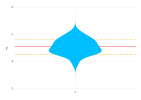

In [42]:
each_lams_mean = mean(each_lams)
each_lams_std = std(each_lams)
upperline = each_lams_mean + each_lams_std
middleline = each_lams_mean
lowerline = each_lams_mean - each_lams_std
plot(y=each_lams, yintercept = [upperline, middleline, lowerline], Geom.violin, Geom.hline(color=["orange","red","orange"], style=[:dash,:solid,:dash]))

In [43]:
lam2 = SAMPLESIZE*mean(gerrors)

5.294404186793807

In [44]:
lam3 = SAMPLESIZE*mean(normalized_WAICs)

3.7765431287461126

In [45]:
println("$M, $N, $H, $H_0, $PHI_U, $PHI_V")
lam_ub = (H_0*(M+N-1) + (H-H_0)*min(PHI_U*M, PHI_V*N))/2

4, 4, 2, 1, 1.0, 1.0


5.5

In [46]:
#Phase Transition Line in VBNMF
phase = M*PHI_U + N*PHI_V < (M+N)/2

false

In [47]:
lam_reg = (M+N)*H/2

8.0

In [48]:
lam_reg_rrr = (M*H + H*N - H*H)/2

6.0

In [49]:
#exact lambda_vb
if phase
    lam_vb = (H-H_0)*(M*PHI_U + N*PHI_V) + (M+N)*H_0/2
else
    lam_vb = lam_reg
end
lam_vb

8.0

In [50]:
#memo: script for convergence diagnox from visual.

In [51]:
#===
for i in 1:M
    for k in 1:H
        p = plot(x=debug_As[i,k,:], Geom.histogram(bincount=12),
                Guide.title("posthist20191226_A[$i.$k]"))
        img = PNG(joinpath("img_MSI","20191226-d1","posthist_A_$i-$k.png"), 16cm, 16cm)
        draw(img,p)
        p = plot(x=1:MCMC_K, y=debug_As[i,k,:], Geom.point, Geom.line,
                Guide.title("posttrace20191226_A[$i.$k]"))
        img = PNG(joinpath("img_MSI","20191226-d1","posttrace_A_$i-$k.png"), 16cm, 16cm)
        draw(img,p)
    end
end

for k in 1:H
    for j in 1:N
        p = plot(x=debug_Bs[k,j,:], Geom.histogram(bincount=12),
                Guide.title("posthist20191226_B[$k.$j]"))
        img = PNG(joinpath("img_MSI","20191226-d1","posthist_B_$k-$j.png"), 16cm, 16cm)
        draw(img,p)
        p = plot(x=1:MCMC_K, y=debug_Bs[k,j,:], Geom.point, Geom.line,
                Guide.title("posttrace20191226_B[$k.$j]"))
        img = PNG(joinpath("img_MSI","20191226-d1","posttrace_B_$k-$j.png"), 16cm, 16cm)
        draw(img,p)
    end
end
===#